<a href="https://colab.research.google.com/github/jamieewong/AI4ALLalzheimers/blob/main/alzheimers_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Alzheimers_Sei_predictions.zip to Alzheimers_Sei_predictions.zip
User uploaded file "Alzheimers_Sei_predictions.zip" with length 11748061 bytes


In [ ]:
import zipfile
with zipfile.ZipFile('/content/sei_output_eqtls.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sei_output_eqtls')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Alzheimers_Sei_predictions.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Alzheimers_Sei_predictions')

We have one of many data files open on the screen right now.
We need to open all of them, and organize them in a way that is proper for machine learning!
Opening all the files one by one and copying and pasting the code that Jamie used is time consuming and error prone, so we will automate that process using python.

*   Use for loop to open the data files
*   Put files that we need in a list
*   Label the data
*   Clean the data
*   Split the data into test and training sets to avoid overfitting
*   Train the model







Exploratory data analysis


1.   How many positive eqtls versus negative eqtls do we have?
2.   Make a plot to see if any of the features tend to be extra big or extra small.





In [ ]:
#Labeled pos_eqtls as 1 and neg_eqtls as 0, we picked out all the files that start with "brain", which then got turned into a new dataframe
import os
import pandas as pd
new_df = pd.DataFrame()
total_num_rows = 0
for folder in os.listdir('/content/sei_output_eqtls/sei_output_eqtls'):
  for file in os.listdir('/content/sei_output_eqtls/sei_output_eqtls/' + folder):
    if 'brain' in file.lower():
      df = pd.read_csv('/content/sei_output_eqtls/sei_output_eqtls/' + folder + "/" + file, sep = "\t")
      #print(f"class = {folder} file name: {file}")
      #print(f"number of rows = {df.shape}")
      total_num_rows = total_num_rows + df.shape[0]
      if folder == 'pos_eqtls':
        df["Class"] = 1
      else:
        df["Class"] = 0
      new_df = new_df.append(df, ignore_index=True)
#print(total_num_rows)
new_df.shape

(24135, 50)

In [ ]:
new_df.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,Class
0,10.498066,True,False,chr15,55408050,NaN,G,A,.,0.395493,...,1.135465,0.404801,0.268234,0.505133,0.914412,2.103623,1.279018,4.574127,0.637868,0
1,7.267328,True,False,chr3,32406177,NaN,G,T,.,0.444596,...,0.673074,0.436283,0.195495,0.502418,0.523800,1.284778,1.022023,2.335515,0.260461,0
2,5.565720,True,False,chr3,44729451,NaN,C,T,.,0.200338,...,-0.493118,0.063653,-0.056921,0.229588,-0.574831,-0.378892,-0.393716,-1.428429,-0.507709,0
3,5.259303,True,False,chr3,44883409,NaN,G,A,.,-0.420476,...,-0.219082,0.105872,0.056617,-0.396873,-0.070060,-0.652527,-0.272706,-0.967808,-0.073973,0
4,4.844226,True,False,chr1,16889585,NaN,T,C,.,0.631475,...,1.082270,0.670706,0.297079,0.288728,0.999909,1.131025,1.167670,4.317172,0.715471,0


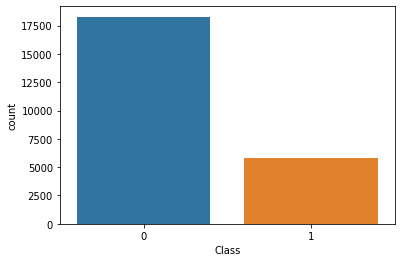

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Class", data=new_df)

In [ ]:
cleaned_df = new_df.drop_duplicates(['chrom', 'pos', 'ref', 'alt'])
cleaned_df.shape

(19208, 50)

In [ ]:
cleaned_df = cleaned_df[cleaned_df['ref'].str.len() == 1]
cleaned_df.shape

(18468, 50)

In [ ]:
cleaned_df = cleaned_df[cleaned_df['alt'].str.len() == 1]
cleaned_df.shape

(17849, 50)

In [ ]:
cleaned_df.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere,Class
0,10.498066,True,False,chr15,55408050,NaN,G,A,.,0.395493,...,1.135465,0.404801,0.268234,0.505133,0.914412,2.103623,1.279018,4.574127,0.637868,0
1,7.267328,True,False,chr3,32406177,NaN,G,T,.,0.444596,...,0.673074,0.436283,0.195495,0.502418,0.523800,1.284778,1.022023,2.335515,0.260461,0
2,5.565720,True,False,chr3,44729451,NaN,C,T,.,0.200338,...,-0.493118,0.063653,-0.056921,0.229588,-0.574831,-0.378892,-0.393716,-1.428429,-0.507709,0
3,5.259303,True,False,chr3,44883409,NaN,G,A,.,-0.420476,...,-0.219082,0.105872,0.056617,-0.396873,-0.070060,-0.652527,-0.272706,-0.967808,-0.073973,0
4,4.844226,True,False,chr1,16889585,NaN,T,C,.,0.631475,...,1.082270,0.670706,0.297079,0.288728,0.999909,1.131025,1.167670,4.317172,0.715471,0


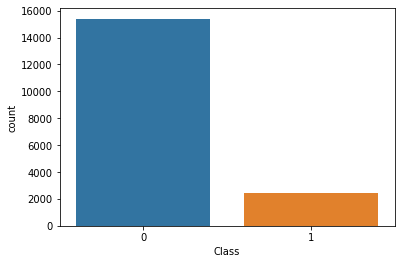

In [ ]:
ax = sns.countplot(x="Class", data=cleaned_df)

In [ ]:
melt_cols = list(cleaned_df.columns[9:-1])
print(melt_cols)

['PC1 Polycomb / Heterochromatin', 'L1 Low signal', 'TN1 Transcription', 'TN2 Transcription', 'L2 Low signal', 'E1 Stem cell', 'E2 Multi-tissue', 'E3 Brain / Melanocyte', 'L3 Low signal', 'E4 Multi-tissue', 'TF1 NANOG / FOXA1', 'HET1 Heterochromatin', 'E5 B-cell-like', 'E6 Weak epithelial', 'TF2 CEBPB', 'PC2 Weak Polycomb', 'E7 Monocyte / Macrophage', 'E8 Weak multi-tissue', 'L4 Low signal', 'TF3 FOXA1 / AR / ESR1', 'PC3 Polycomb', 'TN3 Transcription', 'L5 Low signal', 'HET2 Heterochromatin', 'L6 Low signal', 'P Promoter', 'E9 Liver / Intestine', 'CTCF CTCF-Cohesin', 'TN4 Transcription', 'HET3 Heterochromatin', 'E10 Brain', 'TF4 OTX2', 'HET4 Heterochromatin', 'L7 Low signal', 'PC4 Polycomb / Bivalent stem cell Enh', 'HET5 Centromere', 'E11 T-cell', 'TF5 AR', 'E12 Erythroblast-like', 'HET6 Centromere']


In [ ]:
cleaned_df.columns

Index(['seqclass_max_absdiff', 'ref_match', 'contains_unk', 'chrom', 'pos',
       'id', 'ref', 'alt', 'strand', 'PC1 Polycomb / Heterochromatin',
       'L1 Low signal', 'TN1 Transcription', 'TN2 Transcription',
       'L2 Low signal', 'E1 Stem cell', 'E2 Multi-tissue',
       'E3 Brain / Melanocyte', 'L3 Low signal', 'E4 Multi-tissue',
       'TF1 NANOG / FOXA1', 'HET1 Heterochromatin', 'E5 B-cell-like',
       'E6 Weak epithelial', 'TF2 CEBPB', 'PC2 Weak Polycomb',
       'E7 Monocyte / Macrophage', 'E8 Weak multi-tissue', 'L4 Low signal',
       'TF3 FOXA1 / AR / ESR1', 'PC3 Polycomb', 'TN3 Transcription',
       'L5 Low signal', 'HET2 Heterochromatin', 'L6 Low signal', 'P Promoter',
       'E9 Liver / Intestine', 'CTCF CTCF-Cohesin', 'TN4 Transcription',
       'HET3 Heterochromatin', 'E10 Brain', 'TF4 OTX2', 'HET4 Heterochromatin',
       'L7 Low signal', 'PC4 Polycomb / Bivalent stem cell Enh',
       'HET5 Centromere', 'E11 T-cell', 'TF5 AR', 'E12 Erythroblast-like',
       'HE

In [ ]:
melt_df = pd.melt(cleaned_df, id_vars=['chrom', 'pos', 'ref', 'alt'], value_vars=melt_cols)
melt_df.head()

,chrom,pos,ref,alt,variable,value
0,chr15,55408050,G,A,PC1 Polycomb / Heterochromatin,0.395493
1,chr3,32406177,G,T,PC1 Polycomb / Heterochromatin,0.444596
2,chr3,44729451,C,T,PC1 Polycomb / Heterochromatin,0.200338
3,chr3,44883409,G,A,PC1 Polycomb / Heterochromatin,-0.420476
4,chr1,16889585,T,C,PC1 Polycomb / Heterochromatin,0.631475


In [ ]:
melt_df['value'] = melt_df['value'].abs()
melt_df.head()

,chrom,pos,ref,alt,variable,value
0,chr15,55408050,G,A,PC1 Polycomb / Heterochromatin,0.395493
1,chr3,32406177,G,T,PC1 Polycomb / Heterochromatin,0.444596
2,chr3,44729451,C,T,PC1 Polycomb / Heterochromatin,0.200338
3,chr3,44883409,G,A,PC1 Polycomb / Heterochromatin,0.420476
4,chr1,16889585,T,C,PC1 Polycomb / Heterochromatin,0.631475


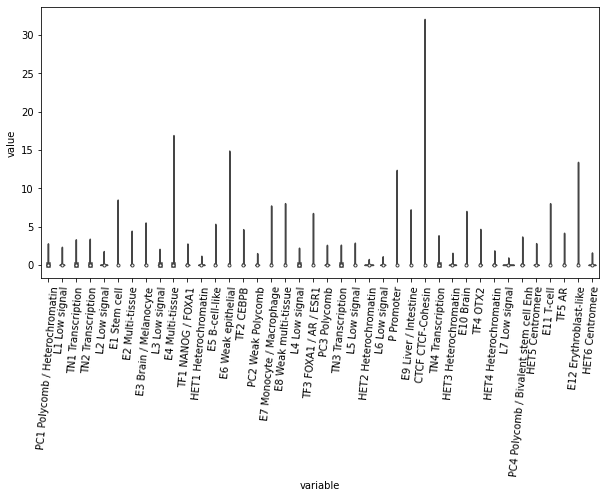

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xticks(rotation=85)
ax = sns.violinplot(x="variable", y="value", data=melt_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = cleaned_df[melt_cols]
y = cleaned_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11958, 40)
(5891, 40)
(11958,)
(5891,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

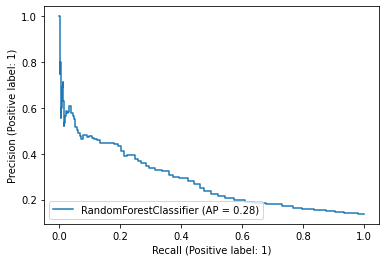

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

In [ ]:
from sklearn.svm import SVC
clf2 = SVC(gamma='auto')
clf2.fit(X_train, y_train)

SVC(gamma='auto')

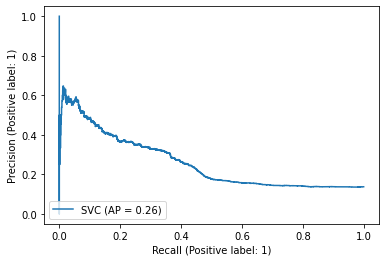

In [ ]:
PrecisionRecallDisplay.from_estimator(clf2, X_test, y_test)

**precision:** how many positive eQTLs were predicted to be causal divided by everything that was predicted to be causal, including false positives. Higher precision means the model correctly predicted lots of positive eqtls as positive eqtls and did not incorrectly predict negative eqtls to be positive eqtls

**recall:** how many positive eQTLs are labeled as positive eQTLs relative to everything that should have been labeled a positive eqtl, including false negatives. Higher recall means the model was able to correctly classify all positive eqtls as positive eqtls, and did not label many as negative eqtls

In [ ]:
#x = input data
y = RandomForestClassifier.predict(x)

In [ ]:
alzheimers_df = pd.DataFrame()
total_num_rows = 0
for file in os.listdir('/content/Alzheimers_Sei_predictions/Alzheimers_Sei_predictions'):
    df2 = pd.read_csv('/content/Alzheimers_Sei_predictions/Alzheimers_Sei_predictions' + "/" + file, sep = "\t")
    print(f"file name: {file}")
    print(f"number of rows = {df2.shape}")
    total_num_rows = total_num_rows + df2.shape[0]
    alzheimers_df = alzheimers_df.append(df2, ignore_index=True)
print(total_num_rows)
alzheimers_df.shape

file name: sequence_class_scores_11.tsv
number of rows = (5000, 49)
file name: sequence_class_scores_05.tsv
number of rows = (5000, 49)
file name: sequence_class_scores_02.tsv
number of rows = (5000, 49)
file name: sequence_class_scores_08.tsv
number of rows = (5000, 49)
file name: sequence_class_scores_06.tsv
number of rows = (5000, 49)
file name: sequence_class_scores_00.tsv
number of rows = (5000, 49)
30000


(30000, 49)

In [ ]:
alzheimers_df.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,37.625284,True,False,chr11,60251677,NaN,C,T,.,-3.261963,...,-7.865056,-6.051111,-2.081554,-1.031840,-2.910029,-3.770526,-9.107899,-6.515771,-13.742623,-2.420227
1,8.134830,True,False,chr2,100670445,NaN,G,C,.,-0.226004,...,-0.296736,-0.375788,-0.291574,-0.021192,-0.131809,-0.295078,-0.607986,-0.381543,-1.613222,-0.177599
2,5.443934,True,False,chr2,105755901,NaN,A,C,.,0.209239,...,0.399274,0.585807,0.263922,0.083432,0.297393,0.111360,0.033626,1.913345,0.579027,0.051468
3,5.378103,True,False,chr10,31978018,NaN,A,G,.,0.446934,...,0.643937,0.696463,0.288482,0.074475,0.397083,0.593093,1.133625,0.992122,1.917128,0.362654
4,4.908283,True,False,chr17,40694772,NaN,C,T,.,0.097220,...,0.286993,0.429157,0.189222,0.068917,0.147446,0.223739,0.218774,2.320133,0.534418,0.183862


In [ ]:
alz_cleaned_df = alzheimers_df.drop_duplicates(['chrom', 'pos', 'ref', 'alt'])
alz_cleaned_df.shape

(30000, 49)

In [ ]:
alz_cleaned_df = alz_cleaned_df[alz_cleaned_df['ref'].str.len() == 1]
alz_cleaned_df.shape

(28343, 49)

In [ ]:
alz_cleaned_df = alz_cleaned_df[alz_cleaned_df['alt'].str.len() == 1]
alz_cleaned_df.shape

(26910, 49)

In [ ]:
alz_cleaned_df = alzheimers_df.drop_duplicates(['chrom', 'pos', 'ref', 'alt'])
alz_cleaned_df = alz_cleaned_df[alz_cleaned_df['ref'].str.len() == 1]
alz_cleaned_df = alz_cleaned_df[alz_cleaned_df['alt'].str.len() == 1]

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,37.625284,True,False,chr11,60251677,NaN,C,T,.,-3.261963,...,-7.865056,-6.051111,-2.081554,-1.031840,-2.910029,-3.770526,-9.107899,-6.515771,-13.742623,-2.420227
1,8.134830,True,False,chr2,100670445,NaN,G,C,.,-0.226004,...,-0.296736,-0.375788,-0.291574,-0.021192,-0.131809,-0.295078,-0.607986,-0.381543,-1.613222,-0.177599
2,5.443934,True,False,chr2,105755901,NaN,A,C,.,0.209239,...,0.399274,0.585807,0.263922,0.083432,0.297393,0.111360,0.033626,1.913345,0.579027,0.051468
3,5.378103,True,False,chr10,31978018,NaN,A,G,.,0.446934,...,0.643937,0.696463,0.288482,0.074475,0.397083,0.593093,1.133625,0.992122,1.917128,0.362654
4,4.908283,True,False,chr17,40694772,NaN,C,T,.,0.097220,...,0.286993,0.429157,0.189222,0.068917,0.147446,0.223739,0.218774,2.320133,0.534418,0.183862


In [ ]:
alzheimers_melt_cols = list(alz_cleaned_df.columns[9:])
alzheimers_melt_df = pd.melt(alz_cleaned_df, id_vars=['chrom', 'pos', 'ref', 'alt'], value_vars=alzheimers_melt_cols)
alzheimers_melt_df['value'] = alzheimers_melt_df['value'].abs()
alzheimers_melt_df.head()

,chrom,pos,ref,alt,variable,value
0,chr11,60251677,C,T,PC1 Polycomb / Heterochromatin,3.261963
1,chr2,100670445,G,C,PC1 Polycomb / Heterochromatin,0.226004
2,chr2,105755901,A,C,PC1 Polycomb / Heterochromatin,0.209239
3,chr10,31978018,A,G,PC1 Polycomb / Heterochromatin,0.446934
4,chr17,40694772,C,T,PC1 Polycomb / Heterochromatin,0.097220


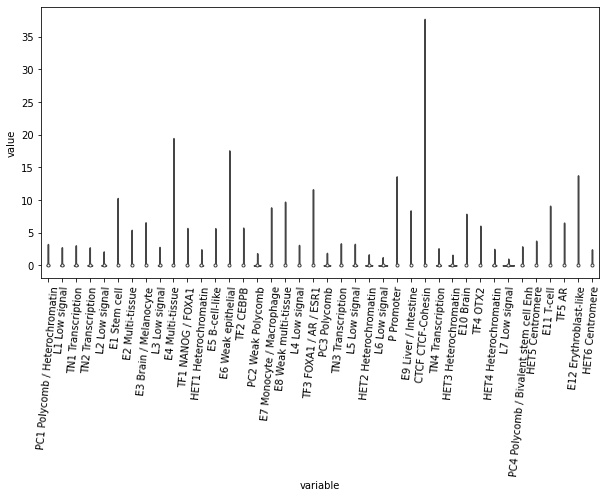

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=85)
ax = sns.violinplot(x="variable", y="value", data=alzheimers_melt_df)

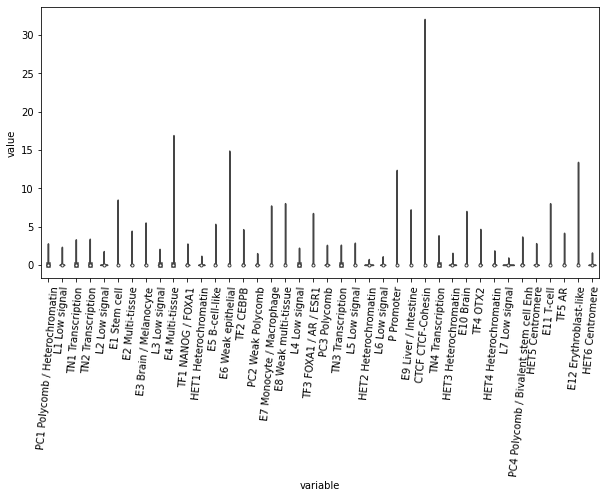

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=85)
ax = sns.violinplot(x="variable", y="value", data=melt_df)

In [ ]:
alz_cleaned_df = alz_cleaned_df[alzheimers_melt_cols]
alz_cleaned_df.head()

,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,E2 Multi-tissue,E3 Brain / Melanocyte,L3 Low signal,E4 Multi-tissue,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,-3.261963,-2.774190,-1.801041,-1.895553,-2.134837,-10.285416,-5.419694,-6.578277,-1.227256,-19.416223,...,-7.865056,-6.051111,-2.081554,-1.031840,-2.910029,-3.770526,-9.107899,-6.515771,-13.742623,-2.420227
1,-0.226004,0.013017,-0.185017,-0.137351,-0.044790,-1.673978,-0.518200,-0.531994,0.125434,-1.750653,...,-0.296736,-0.375788,-0.291574,-0.021192,-0.131809,-0.295078,-0.607986,-0.381543,-1.613222,-0.177599
2,0.209239,0.423387,0.168033,0.225205,0.353876,0.790752,0.770147,0.594418,0.159347,1.455939,...,0.399274,0.585807,0.263922,0.083432,0.297393,0.111360,0.033626,1.913345,0.579027,0.051468
3,0.446934,0.258722,0.391452,0.291750,0.221518,1.529634,1.898674,1.144061,0.166153,5.007700,...,0.643937,0.696463,0.288482,0.074475,0.397083,0.593093,1.133625,0.992122,1.917128,0.362654
4,0.097220,0.209422,-0.184442,-0.183492,0.260692,0.726707,0.247132,0.309686,-0.074903,1.283966,...,0.286993,0.429157,0.189222,0.068917,0.147446,0.223739,0.218774,2.320133,0.534418,0.183862


In [ ]:
import joblib
scaler = joblib.load('/content/scaler.joblib')
rfc = joblib.load('/content/RFC.joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use

In [ ]:
alz_cleaned_df = scaler.transform(alz_cleaned_df)
alz_cleaned_df

array([[-3.18526793e+01, -4.32273363e+01, -1.56570806e+01, ...,
        -4.36364460e+01, -4.61551266e+01, -4.33154668e+01],
       [-2.17268265e+00,  1.86714630e-01, -1.61401014e+00, ...,
        -2.56320303e+00, -5.43270016e+00, -3.17845429e+00],
       [ 2.08231761e+00,  6.57871553e+00,  1.45395010e+00, ...,
         1.28027941e+01,  1.92740929e+00,  9.21222864e-01],
       ...,
       [ 3.71937779e-02, -1.13140767e-02, -6.27463680e-03, ...,
        -8.04525112e-03, -1.64492088e-02, -9.72685030e-05],
       [ 3.71996603e-02, -1.47227563e-02, -6.32363080e-03, ...,
        -8.38982257e-03, -1.65899578e-02, -3.75647472e-03],
       [ 3.58786203e-02, -1.66229428e-02, -7.40880544e-03, ...,
        -8.71214923e-03, -1.66821918e-02, -1.81064304e-03]])

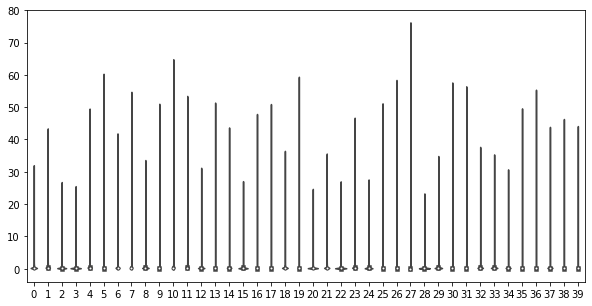

In [ ]:
import numpy as np
normalized_data = alz_cleaned_df
plt.figure(figsize=(10,5))
ax = sns.violinplot(data=np.abs(normalized_data))

In [ ]:
alz_predictions = rfc.predict(alz_cleaned_df)
print(alz_predictions)

[1 0 0 ... 0 0 0]


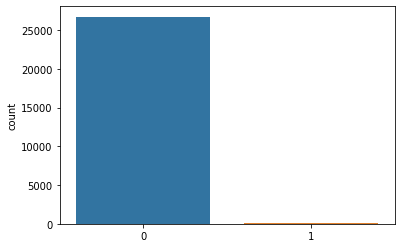

In [ ]:
ax = sns.countplot(x=alz_predictions)

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

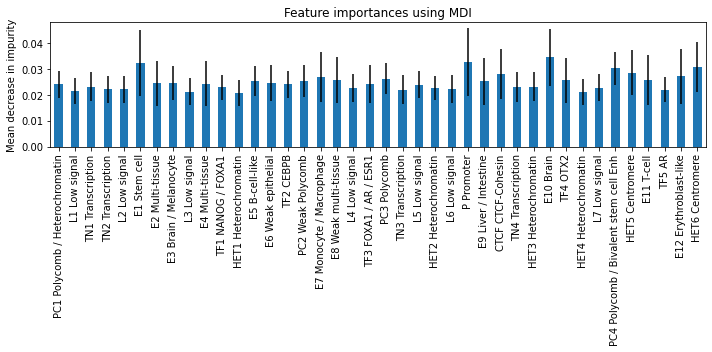

In [ ]:
forest_importances = pd.Series(importances, index=alzheimers_melt_cols)

fig, ax = plt.subplots(figsize = (10,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
alzheimers_df.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,37.625284,True,False,chr11,60251677,NaN,C,T,.,-3.261963,...,-7.865056,-6.051111,-2.081554,-1.031840,-2.910029,-3.770526,-9.107899,-6.515771,-13.742623,-2.420227
1,8.134830,True,False,chr2,100670445,NaN,G,C,.,-0.226004,...,-0.296736,-0.375788,-0.291574,-0.021192,-0.131809,-0.295078,-0.607986,-0.381543,-1.613222,-0.177599
2,5.443934,True,False,chr2,105755901,NaN,A,C,.,0.209239,...,0.399274,0.585807,0.263922,0.083432,0.297393,0.111360,0.033626,1.913345,0.579027,0.051468
3,5.378103,True,False,chr10,31978018,NaN,A,G,.,0.446934,...,0.643937,0.696463,0.288482,0.074475,0.397083,0.593093,1.133625,0.992122,1.917128,0.362654
4,4.908283,True,False,chr17,40694772,NaN,C,T,.,0.097220,...,0.286993,0.429157,0.189222,0.068917,0.147446,0.223739,0.218774,2.320133,0.534418,0.183862


In [ ]:
mask = []
for prediction in alz_predictions:
  if prediction == 1:
    mask.append(True)
  else:
    mask.append(False)
print(mask)

[True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, F

In [ ]:
alz_mutation_name_df = alzheimers_df.drop_duplicates(['chrom', 'pos', 'ref', 'alt'])
alz_mutation_name_df = alz_mutation_name_df[alz_mutation_name_df['ref'].str.len() == 1]
alz_mutation_name_df = alz_mutation_name_df[alz_mutation_name_df['alt'].str.len() == 1]

alz_mutation_name_df.loc[mask]

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,37.625284,True,False,chr11,60251677,NaN,C,T,.,-3.261963,...,-7.865056,-6.051111,-2.081554,-1.031840,-2.910029,-3.770526,-9.107899,-6.515771,-13.742623,-2.420227
3,5.378103,True,False,chr10,31978018,NaN,A,G,.,0.446934,...,0.643937,0.696463,0.288482,0.074475,0.397083,0.593093,1.133625,0.992122,1.917128,0.362654
6,3.974559,True,False,chr22,29084036,NaN,G,T,.,0.156135,...,0.196911,0.208164,0.222039,0.143589,0.138094,0.395016,0.579434,0.298864,3.974559,0.179159
14,2.990784,True,False,chr11,78417001,NaN,C,G,.,-0.063575,...,-0.730809,-0.445088,-0.156731,-0.110234,-0.096615,-0.632385,-0.650167,-0.375153,-0.944441,-0.537971
19,2.691331,True,False,chr10,71358528,NaN,C,G,.,-0.301188,...,0.089171,0.070681,0.015271,0.110756,-0.064286,0.246392,2.361106,0.064993,1.003493,0.157112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,0.600989,True,False,chr1,178061466,NaN,A,G,.,-0.027169,...,-0.526760,-0.163996,-0.035317,-0.029359,-0.037181,-0.108402,-0.070102,-0.123522,-0.153970,-0.040032
25314,0.580779,True,False,chr2,51299623,NaN,A,G,.,-0.062166,...,-0.580779,-0.181673,0.094290,0.033792,-0.075575,-0.009275,-0.106810,-0.126428,-0.118494,-0.002434
25357,0.524707,True,False,chr9,79570439,NaN,G,A,.,-0.524707,...,-0.140877,-0.060872,-0.201849,-0.048343,-0.464376,-0.012288,-0.352309,-0.159416,-0.045138,-0.003555
25586,0.342275,True,False,chr17,45942346,NaN,G,A,.,-0.342275,...,-0.045105,-0.100942,-0.122258,-0.019419,-0.070635,-0.044749,-0.074604,0.083241,-0.028014,-0.030914
